# Time Series Forecasting for Covid-19 daily new cases in Zip code 63146 using  Prophet

In [3]:
# Python
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from fbprophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('cases.csv')
print(df)

    State  County  Zip        Date
0    1267     387   13  08/13/2020
1    1245     289   10  08/14/2020
2    1127     256    7  08/15/2020
3    1342     187    5  08/16/2020
4    1148     150    9  08/17/2020
..    ...     ...  ...         ...
88   3876     605  202    12/07/20
89   2658     617  200    12/08/20
90   3250     591  195    12/09/20
91   2640     447  191    12/10/20
92   3858     409  182    12/11/20

[93 rows x 4 columns]


In [5]:
df_zip = df[["Date","Zip"]]
df_zip = df_zip.rename(columns={'Zip': 'y', 'Date': 'ds'})
df_zip.head()

,ds,y
0,08/13/2020,13
1,08/14/2020,10
2,08/15/2020,7
3,08/16/2020,5
4,08/17/2020,9


In [6]:
train_data = df_zip.iloc[:len(df_zip)-10]
test_data = df_zip.iloc[len(df_zip)-10:]
print(test_data)

          ds    y
83  12/01/20  240
84  12/03/20  234
85  12/04/20  233
86  12/05/20  214
87  12/06/20  218
88  12/07/20  202
89  12/08/20  200
90  12/09/20  195
91  12/10/20  191
92  12/11/20  182


In [7]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods=10)
prophet_pred = m.predict(future)
prophet_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
88,2020-12-06,313.771993,298.747417,329.446158
89,2020-12-07,319.929411,303.836096,335.113813
90,2020-12-08,326.276130,311.449717,342.138883
91,2020-12-09,334.353161,318.185722,349.851851
92,2020-12-10,339.927966,323.731686,355.672379


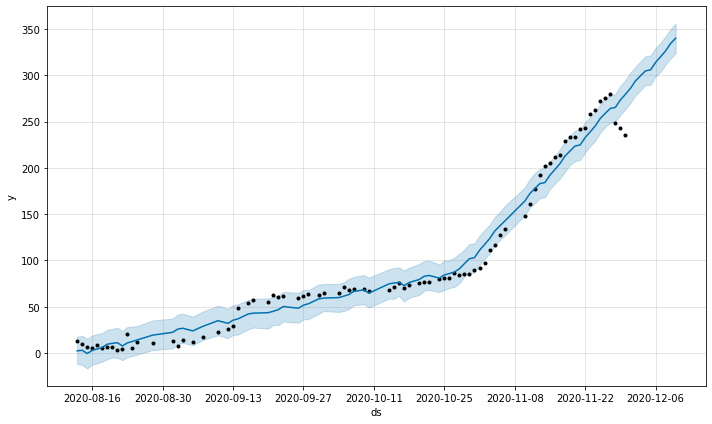

In [8]:
fig1 = m.plot(prophet_pred)

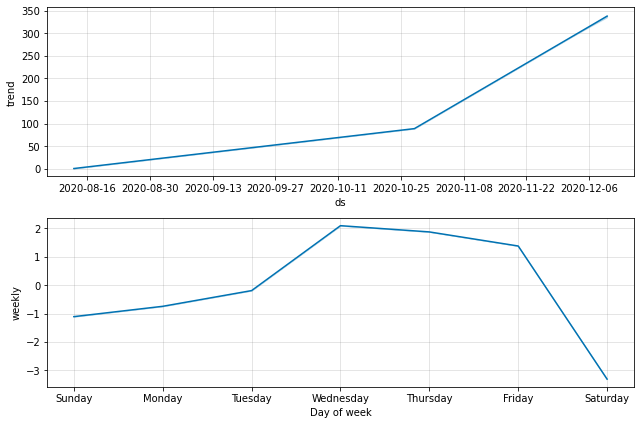

In [9]:
fig2 = m.plot_components(prophet_pred)

In [10]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-10:]['ds'], "Pred" : prophet_pred[-10:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred

,Pred
Date,
2020-12-01,285.716154
2020-12-02,293.793185
2020-12-03,299.367990
2020-12-04,304.666921
2020-12-05,305.780191
2020-12-06,313.771993
2020-12-07,319.929411
2020-12-08,326.276130
2020-12-09,334.353161


<ipython-input-11-b9d8127c6aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Prophet_Predictions"] = prophet_pred['Pred'].values


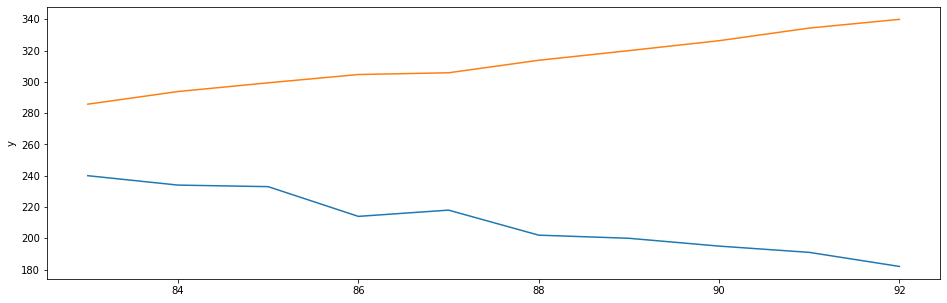

In [11]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["y"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

#### The blue line represents dialy new Covid cases in Zip code 63146 and the orange line represents Prophet Predictions.


In [12]:
mae_error = mean_absolute_error(test_data['y'], test_data["Prophet_Predictions"])
mse_error = mean_squared_error(test_data['y'], test_data["Prophet_Predictions"])
rmse_error = np.sqrt(mse_error)
mean_value = df['Zip'].mean()

print(f'MAE Error: {mae_error} \nMSE Error: {mse_error}\nRMSE Error: {rmse_error}\nMean: {mean_value}')

MAE Error: 101.45831015425645 
MSE Error: 11559.658980184962
RMSE Error: 107.51585455264244
Mean: 109.65591397849462
